In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ls ../results/muestras

gaussian_1_1e6/  kraskov_1/  kraskov_2/


In [3]:
ls ../results/firing_rates_1e5

dmn/  dmn_drug/  no_dmn/


In [4]:
is_dmn = True

In [5]:
if is_dmn:
    results_folder = "../results/firing_rates_1e5/"
else:
    results_folder = "../results/muestras/kraskov_2/"

gaussian_results = {}
for gaussian_i in sorted(os.listdir(results_folder)):
    gaussian_i_folder = os.path.join(results_folder, gaussian_i)
    gaussian_results[gaussian_i] = {
        "mean": [],
        "std": []
    }
    for n_data in sorted(os.listdir(gaussian_i_folder)):
        data_filepath = os.path.join(gaussian_i_folder, n_data, "results_samples.txt")
        data = np.loadtxt(data_filepath, delimiter=",")
        print(gaussian_i, n_data, data.shape, data_filepath)
        data_mean, data_std = data.mean(axis=0), data.std(axis=0)
        gaussian_results[gaussian_i]["mean"].append(data_mean)
        gaussian_results[gaussian_i]["std"].append(data_std)

dmn 100 (100, 3) ../results/firing_rates_1e5/dmn/100/results_samples.txt
dmn 1000 (100, 3) ../results/firing_rates_1e5/dmn/1000/results_samples.txt
dmn 10000 (100, 3) ../results/firing_rates_1e5/dmn/10000/results_samples.txt
dmn 100000 (100, 3) ../results/firing_rates_1e5/dmn/100000/results_samples.txt
dmn_drug 100 (100, 3) ../results/firing_rates_1e5/dmn_drug/100/results_samples.txt
dmn_drug 1000 (100, 3) ../results/firing_rates_1e5/dmn_drug/1000/results_samples.txt
dmn_drug 10000 (100, 3) ../results/firing_rates_1e5/dmn_drug/10000/results_samples.txt
dmn_drug 100000 (100, 3) ../results/firing_rates_1e5/dmn_drug/100000/results_samples.txt
no_dmn 100 (100, 3) ../results/firing_rates_1e5/no_dmn/100/results_samples.txt
no_dmn 1000 (100, 3) ../results/firing_rates_1e5/no_dmn/1000/results_samples.txt
no_dmn 10000 (100, 3) ../results/firing_rates_1e5/no_dmn/10000/results_samples.txt
no_dmn 100000 (100, 3) ../results/firing_rates_1e5/no_dmn/100000/results_samples.txt


In [6]:
gaussian_results

{'dmn': {'mean': [array([1.766081  , 1.6333995 , 0.13267972]),
   array([ 0.8055535,  1.2389935, -0.4334407]),
   array([ 0.2699418,  0.6615129, -0.3915711]),
   array([ 0.09613813,  0.3662441 , -0.2701064 ])],
  'std': [array([0.44474234, 0.3303298 , 0.30667253]),
   array([0.11785531, 0.12689115, 0.10215755]),
   array([0.04040581, 0.05260551, 0.04302272]),
   array([0.00931181, 0.01736814, 0.01671884])]},
 'dmn_drug': {'mean': [array([1.5729737 , 1.4176066 , 0.15536529]),
   array([ 0.6858587 ,  1.0277378 , -0.34187924]),
   array([ 0.2124403,  0.549949 , -0.3375086]),
   array([ 0.07040172,  0.3142838 , -0.2438823 ])],
  'std': [array([0.38734039, 0.27909186, 0.2749451 ]),
   array([0.09571956, 0.10756527, 0.09746069]),
   array([0.03235296, 0.05165245, 0.04266402]),
   array([0.01011811, 0.01676689, 0.0146949 ])]},
 'no_dmn': {'mean': [array([1.7945477 , 1.6879364 , 0.10661108]),
   array([ 0.856192 ,  1.3229927, -0.4668021]),
   array([ 0.27384  ,  0.7085841, -0.4347445]),
   arr

In [7]:
try:
    with open("../data/muestras_1e5/index.json", "r") as f:
        index = json.load(f)
except:
    pass

In [8]:
index

{'gaussian_1': {'cov': [[0.9486545337793236,
    0.8898027211921073,
    0.6100372359467587],
   [0.8898027211921073, 0.8713281325959036, 0.5399206528673799],
   [0.6100372359467587, 0.5399206528673799, 0.4206449508316386]],
  'TC': 14.942948002189445,
  'DTC': 24.511912843159863,
  'O': -9.568964840970418,
  'TC_list': [2.284166784638797, 12.658781217550647],
  'DTC_list': [12.658781217550647, 11.853131625609215]},
 'gaussian_2': {'cov': [[1.7820428291000843,
    2.0761737700739205,
    1.8630084127252586],
   [2.0761737700739205, 2.45134450246227, 2.20499211418001],
   [1.8630084127252586, 2.20499211418001, 2.0013729474860438]],
  'TC': 6.553575100639645,
  'DTC': 3.9794005557070147,
  'O': 2.5741745449326308,
  'TC_list': [3.118657082641789, 3.4349180179978562],
  'DTC_list': [3.4349180179978562, 0.5444825377091584]},
 'gaussian_3': {'cov': [[1.4047522276240016,
    0.7133489283801965,
    1.3754991844892672],
   [0.7133489283801965, 1.1990381936177523, 1.2639095070810848],
   [1.37

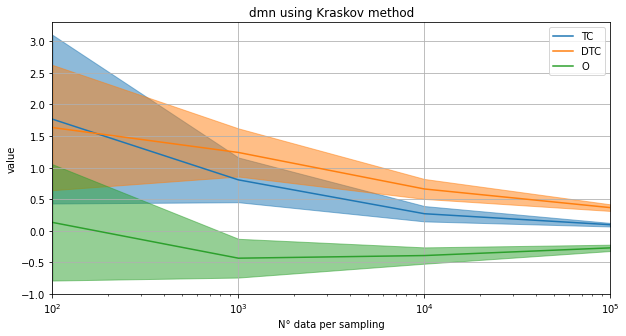

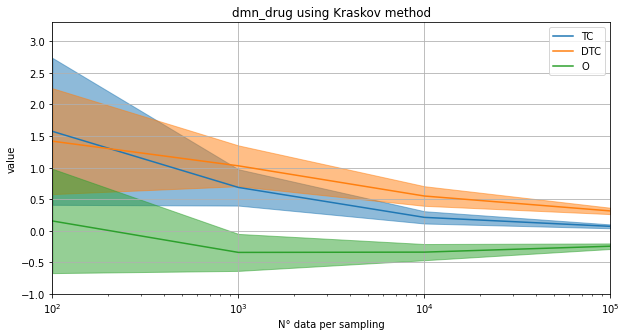

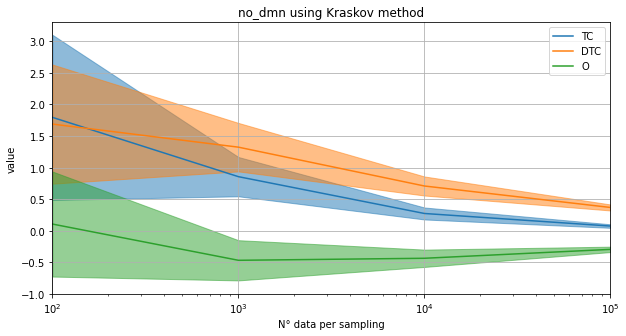

In [11]:
metrics_plot = ["TC", "DTC", "O"]
#index_data = [100, 1000, 10000, 100000, 1000000]
index_data = [100, 1000, 10000, 100000]
for gaussian_i in sorted(os.listdir(results_folder)):
    try:
        fig, ax = plt.subplots(figsize=(10,5))
        mean = pd.DataFrame(gaussian_results[gaussian_i]["mean"], columns=["TC", "DTC", "O"], index=index_data)
        std = pd.DataFrame(gaussian_results[gaussian_i]["std"], columns=["TC", "DTC", "O"], index=index_data)
        mean[metrics_plot].plot(ax=ax)
        for i, metric_plot in enumerate(metrics_plot):
            ax.fill_between(mean.index, mean[metric_plot]-3*std[metric_plot], mean[metric_plot]+3*std[metric_plot], color=f"C{i}", alpha=0.5)
            if not is_dmn:
                ax.axhline(y=index[gaussian_i][metric_plot], color=f'C{i}', linestyle='--')
        ax.set_title(f"{gaussian_i} using Kraskov method")
        ax.set_xscale('log')
        ax.set_xlim(index_data[0], index_data[-1])
        ax.grid()
        ax.set_xlabel("N° data per sampling")
        ax.set_ylabel("value")
        ax.set_ylim(-1, 3.3)
        fig.savefig(f"../results/plots/{metrics_plot}_{gaussian_i}.pdf")
    except:
        print("probably an error with index_data")
        pass

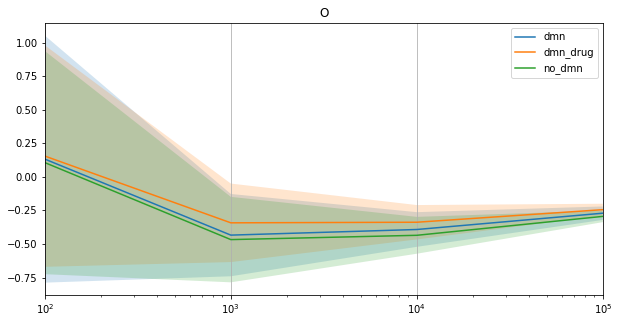

In [10]:
metric_plot = "O"
i = 0
for gaussian_i in sorted(os.listdir(results_folder)):
    if i % 3 == 0:
        i = 0
        fig, ax = plt.subplots(figsize=(10,5))
    mean = pd.DataFrame(gaussian_results[gaussian_i]["mean"], columns=["TC", "DTC", "O"], index=index_data)
    std = pd.DataFrame(gaussian_results[gaussian_i]["std"], columns=["TC", "DTC", "O"], index=index_data)
    mean = mean.rename(columns={metric_plot: gaussian_i})
    mean[[gaussian_i]].plot(ax=ax)
    ax.fill_between(mean.index, mean[gaussian_i]-3*std[metric_plot], mean[gaussian_i]+3*std[metric_plot], alpha=0.2)
    if not is_dmn:
        ax.axhline(y=index[gaussian_i][metric_plot], color=f"C{i}", linestyle='--')
    ax.set_xscale('log')
    ax.set_title(metric_plot)
    plt.xlim(10**2, 10**5)
    plt.grid(axis="x")
    #fig.savefig(f"../results/plots/groups/group_{metric_plot}_{gaussian_i}.png")
    i += 1